In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [2]:
X, y = make_classification(n_samples = 2000, 
                           n_features = 30,
                           n_informative = 15, 
                           n_redundant = 10,
                           random_state = 42, 
                           shuffle = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True, stratify = None)

<Axes: >

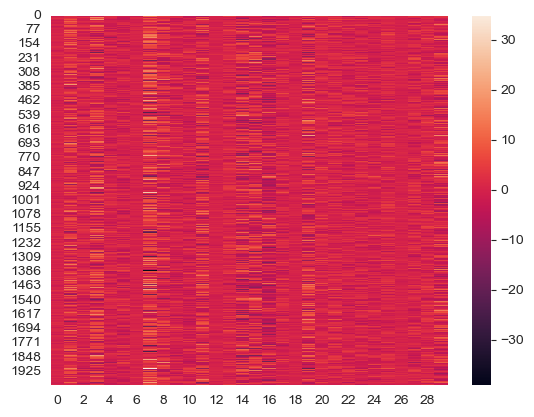

In [5]:
import seaborn as sns
sns.heatmap(X)

In [6]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter = "best", max_leaf_nodes = None),
                            n_estimators = 500, 
                            max_samples = 100, 
                            bootstrap = True, 
                            n_jobs = -1, 
                            oob_score = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
y_pred = bag_clf.predict(X_test)

print('Out-of-bag score on training: {}'.format(bag_clf.oob_score_))
print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))

Out-of-bag score on training: 0.8471428571428572
Test Score: 0.855


In [7]:
# Random Forest
rnd_clf = RandomForestClassifier(n_estimators = 500, 
                                 max_leaf_nodes = 16, 
                                 n_jobs = -1, 
                                 oob_score = True)
rnd_clf.fit(X_train, y_train) 
y_pred_rf = rnd_clf.predict(X_test)

# Bagging -> RF
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter = "random", max_leaf_nodes = 16),
                            n_estimators = 500, 
                            max_samples = 1.0, 
                            bootstrap = True, 
                            n_jobs = -1, 
                            oob_score = True)
bag_clf.fit(X_train, y_train)
y_pred_bagging = bag_clf.predict(X_test)

In [8]:
print('Random Forest Classifier')
print('Out-of-bag score on training: {}'.format(rnd_clf.oob_score_))
print('Test Score: {}'.format(accuracy_score(y_test, y_pred_rf)))
print('')

print('Bagging Classifier')
print('Out-of-bag score on training: {}'.format(bag_clf.oob_score_))
print('Test Score: {}'.format(accuracy_score(y_test, y_pred_bagging)))

Random Forest Classifier
Out-of-bag score on training: 0.8621428571428571
Test Score: 0.8666666666666667

Bagging Classifier
Out-of-bag score on training: 0.8592857142857143
Test Score: 0.8733333333333333
